## STUDENT PERFORMANCE EDA

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Importing Libraries**](#Section3)<br>
  
**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Handling of Missing Data**](#Section51)
  - **5.2** [**Handling of Redundant Data**](#Section52)
  - **5.3** [**Handling of Inconsistent Data**](#Section53)
  - **5.4** [**Handling of Outliers**](#Section54)

**6.** [**Exploratory Data Analysis**](#Section6)<br>
  - **6.1** [**Pre-Profiling Data**](#Section61)
  - **6.2** [**Adding new columns Total and Average**](#Section62)
  - **6.3** [**Analysing Full Scoring and Failing Students**](#Section63)
  - **6.4** [**Exploring Data (Visualization)**](#Section641)
  -- **6.4.1** [**Visualize average score distribution to make some conclusion.**](#Section641)
  -- **6.4.2** [**Maximumum score of students in all three subjects**](#Section642)
  -- **6.4.3** [**Assolication between parents education and Students performance**](#Section643)
  -- **6.4.4** [**Assolication between race and student performance**](#Section644)
  -- **6.4.5** [**Maximum score of students in all three subjects**](#Section645)
  - **6.5** [**Multivariate analysis using pieplot**](#Section65)
  - **6.6** [**Feature Wise Visualization**](#Section66)
  -- **6.6.1** [**Gender Column**](#Section661)
  -- **6.6.2** [**Race/Ehnicity Column**](#Section662)
  -- **6.6.3** [**Parental Level of Education Column**](#Section663)
  -- **6.6.4** [**Lunch Column**](#Section664)
  -- **6.6.5** [**Test Preparation Course Column**](#Section665)
  -- **6.6.6** [**Check Outliers**](#Section666)
  -- **6.6.7** [**MUTIVARIATE ANALYSIS USING PAIRPLOT**](#Section667)

**7.** [**Summarization**](#Section7)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- This EDA is to understand the impact of different attributes of students life on there Performance.

- We will try to dig deep into the data and understand how gender, race and family history etc play part on the scores of students.

- With the help of this insight we can develope a Predictive model for future analysis

---
<a name = Section2></a>
# **2. Problem Statement**
---

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

---
<a name = Section3></a>
# **3 Import Libraries**
---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
<a name = Section4></a>
# **4 Data Acquisition & Description**
---

In [4]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **information about the data** and see some observations.

In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<a name = Section42></a>
### **4.2 Data Information**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

---
<a name=Section5></a>
# **5 Data Preprocessing and Profiling**
---

<a name = Section51></a>
### **5.1 Handling of Missing Data**

- In this section, we will identify missing data and check the proportion of it and take appropriate measures.

In [6]:
(100*(df.shape[0] - df.count())/df.shape[0]).sort_values(ascending = False)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

<a name = Section52></a>
### **5.2 Handling of Redundant Data**
    - No Redundant Data

<a name = Section53></a>
### **5.3 Handling of Inconsistent Data**

In [33]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

**Observations**
- Although there are 4 types of groups need clarity on which group is what

<a name = Section54></a>
### **5.4 Handling of Outliers**

In [38]:
df.describe()

,math score,reading score,writing score,total_score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


- No Outliers noted

---
<a name = Section6></a>
# **6 Exploratory Data Analysis**

<a name= Section61></a>
### **6.1 Pre-Profiling Data**
- Understanding data uniqueness per column

In [7]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [8]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [9]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [11]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [12]:
df['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8], dtype=int64)

In [13]:
df['reading score'].unique()

array([ 72,  90,  95,  57,  78,  83,  43,  64,  60,  54,  52,  81,  53,
        75,  89,  32,  42,  58,  69,  73,  71,  74,  70,  65,  87,  56,
        61,  84,  55,  44,  41,  85,  59,  17,  39,  80,  37,  63,  51,
        49,  26,  68,  45,  47,  86,  34,  79,  66,  67,  91, 100,  76,
        77,  82,  92,  93,  62,  88,  50,  28,  48,  46,  23,  38,  94,
        97,  99,  31,  96,  24,  29,  40], dtype=int64)

In [14]:
df['writing score'].unique()

array([ 74,  88,  93,  44,  75,  78,  92,  39,  67,  50,  52,  43,  73,
        70,  58,  86,  28,  46,  61,  63,  53,  80,  72,  55,  65,  38,
        82,  79,  83,  59,  57,  54,  68,  66,  62,  76,  48,  42,  87,
        49,  10,  34,  71,  37,  56,  41,  22,  81,  45,  36,  89,  47,
        90, 100,  64,  98,  51,  40,  84,  69,  33,  60,  85,  91,  77,
        27,  94,  95,  19,  35,  32,  96,  97,  99,  15,  30,  23],
      dtype=int64)

In [20]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [21]:
print(" We have {} number of Numerical columns in the data {}".format(len(numeric_feature), numeric_feature))
print(" We have {} number of Numerical columns in the data {}".format(len(categorical_feature), categorical_feature))

 We have 3 number of Numerical columns in the data ['math score', 'reading score', 'writing score']
 We have 5 number of Numerical columns in the data ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


<a name = Section62></a>
### **6.2 Adding new columns Total and Average**

In [8]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<a name = Section63></a>
### **6.3 Analysing Full Scoring and Failing Students**

In [29]:
full_marks_reading = df[df['reading score'] == 100]['average'].count()
full_marks_writing = df[df['writing score'] == 100]['average'].count()
full_marks_maths = df[df['math score'] == 100]['average'].count()

In [31]:
print(f'Number of students with full marks in Maths: {full_marks_maths}')
print(f'Number of students with full marks in Writing: {full_marks_writing}')
print(f'Number of students with full marks in Reading: {full_marks_reading}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [39]:
low_marks_reading = df[df['reading score'] < 20]['average'].count()
low_marks_writing = df[df['writing score'] < 20]['average'].count()
low_marks_maths = df[df['math score'] < 20]['average'].count()

In [41]:
print(f'Number of students with Failing marks in Maths: {low_marks_maths}')
print(f'Number of students with Failing marks in Writing: {low_marks_writing}')
print(f'Number of students with Failing marks in Reading: {low_marks_reading}')

Number of students with Failing marks in Maths: 4
Number of students with Failing marks in Writing: 3
Number of students with Failing marks in Reading: 1


---
<a name = Section641></a>
## **6.4 Exploring Data (Visualization)**
---

<a name= Section641></a>
  ###  **6.4.1 Visualize average score distribution to make some conclusion.**

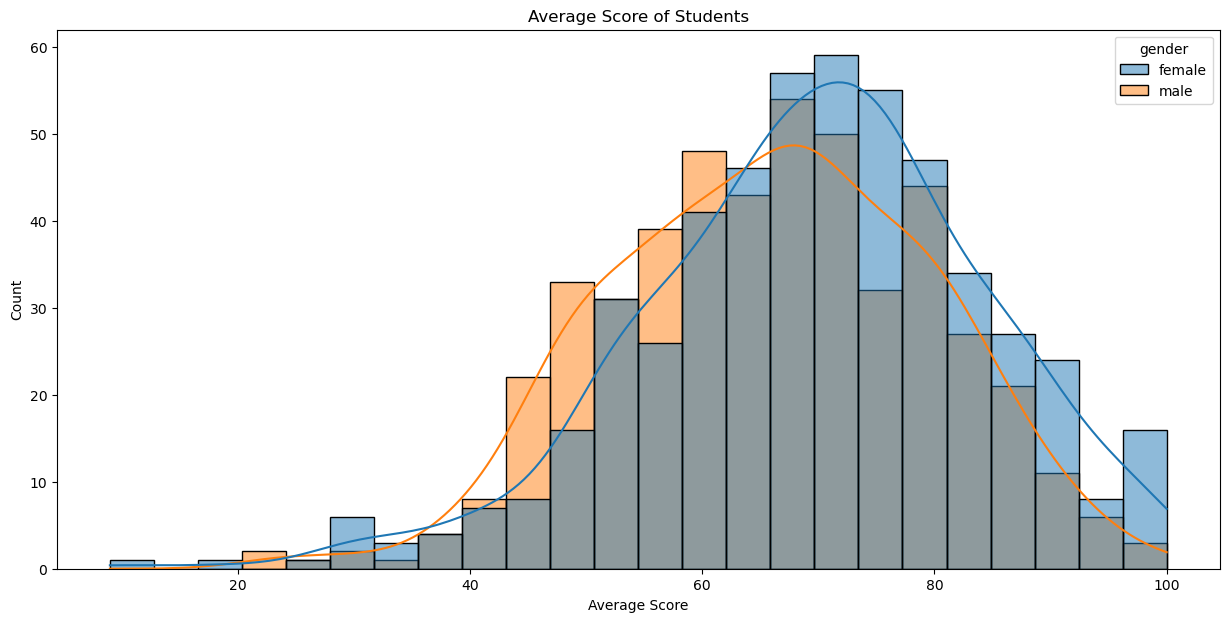

In [9]:
plt.figure(figsize=(15,7))
sns.histplot(data = df, x = 'average', kde = True, hue = 'gender')
plt.title('Average Score of Students')
plt.xlabel('Average Score')
plt.show()

**Observation**
- Most of the students scored between roughly 45 to 90

In [42]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'total_score', 'average'],
      dtype='object')

<a name= Section642></a>
### **6.4.2 Maximumum score of students in all three subjects**

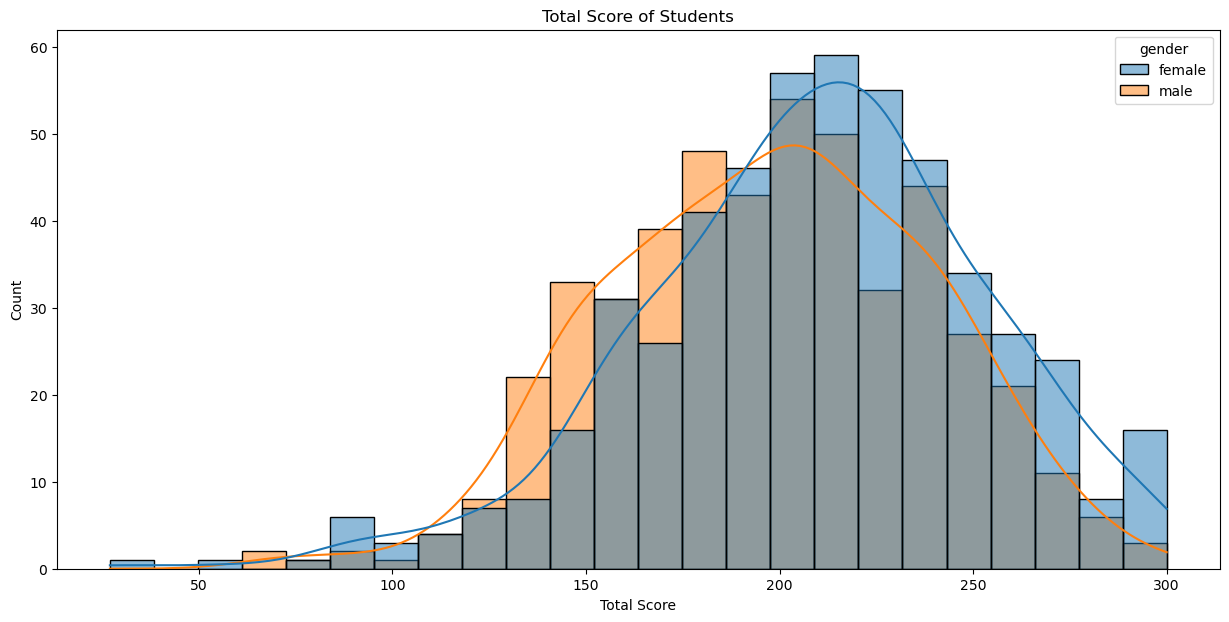

In [52]:
plt.figure(figsize=(15,7))
sns.histplot(data = df, x = 'total_score', kde = True, hue = 'gender')
plt.title('Total Score of Students')
plt.xlabel("Total Score")
plt.show()

**Observation**
- Female students seem to perform better the males students

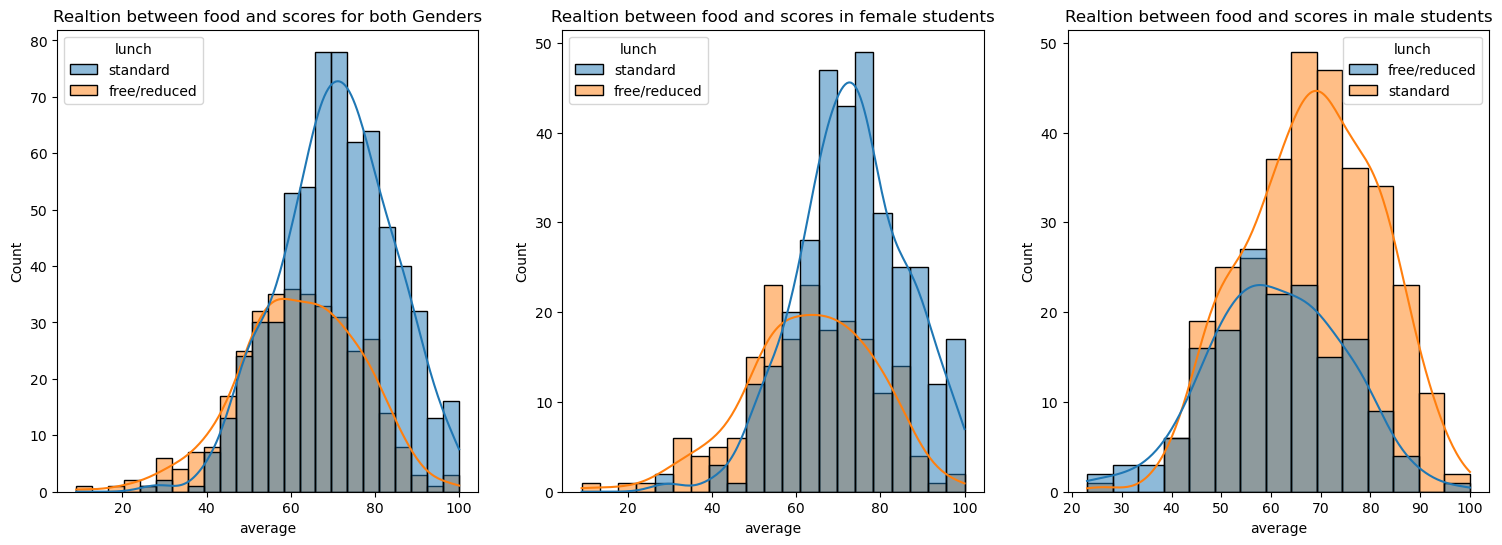

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average',kde = True,hue='lunch')
plt.title("Realtion between food and scores for both Genders")

plt.subplot(142)
sns.histplot(data = df[df['gender']== 'female'],x = 'average',kde = True, hue= 'lunch')
plt.title("Realtion between food and scores in female students")

plt.subplot(143)
sns.histplot(data = df[df['gender']== 'male'],x = 'average',kde = True, hue= 'lunch')
plt.title("Realtion between food and scores in male students")
plt.show()

### Observations
- The Average score of students who consume standard food is far more then who do not irrespective of gender.
- The count of Students having free\ reduced lunch is considerably low.

<a name= Section643></a>
### 6.4.3 **Assolication between parents education and Students performance**

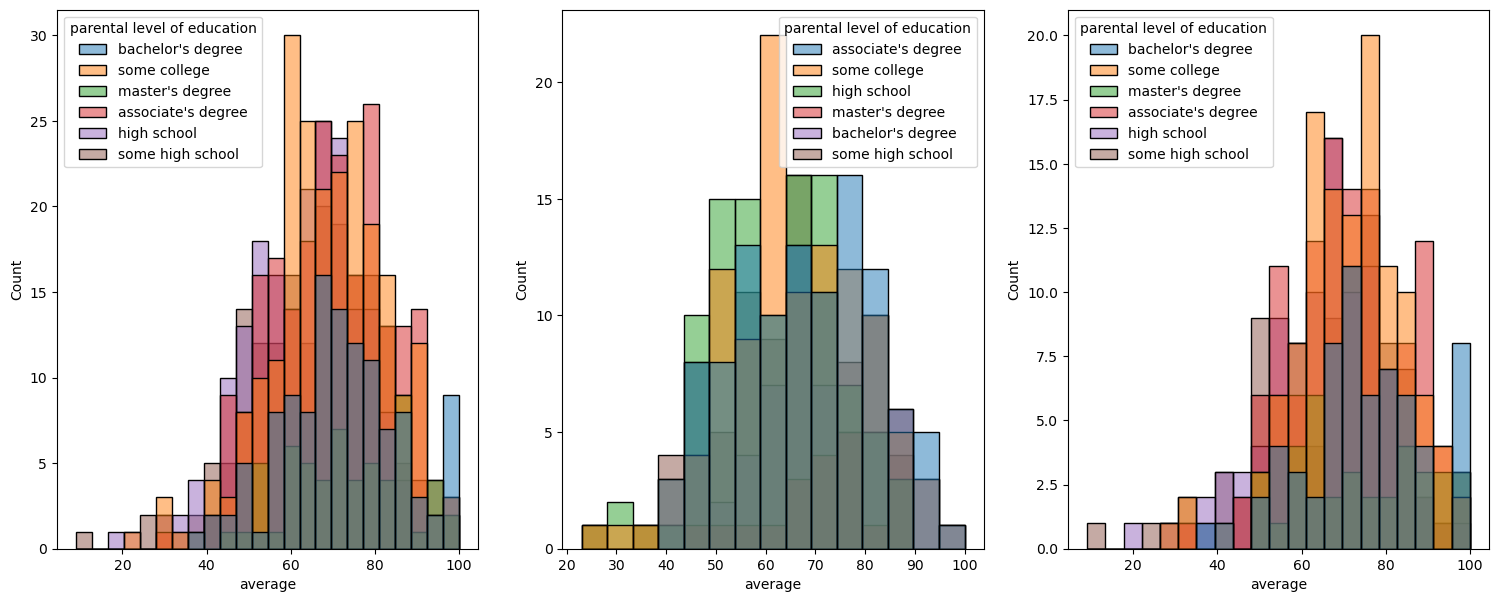

In [34]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data = df,x = 'average',hue = 'parental level of education')

plt.subplot(142)
sns.histplot(data = df[df['gender']=='male'], x = 'average',hue = 'parental level of education')

plt.subplot(143)
sns.histplot(data = df[df['gender']=='female'], x = 'average',hue = 'parental level of education')
plt.show()

### Observation
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

<a name=Section644></a>
### **6.4.4 Assolication between race and student performance**

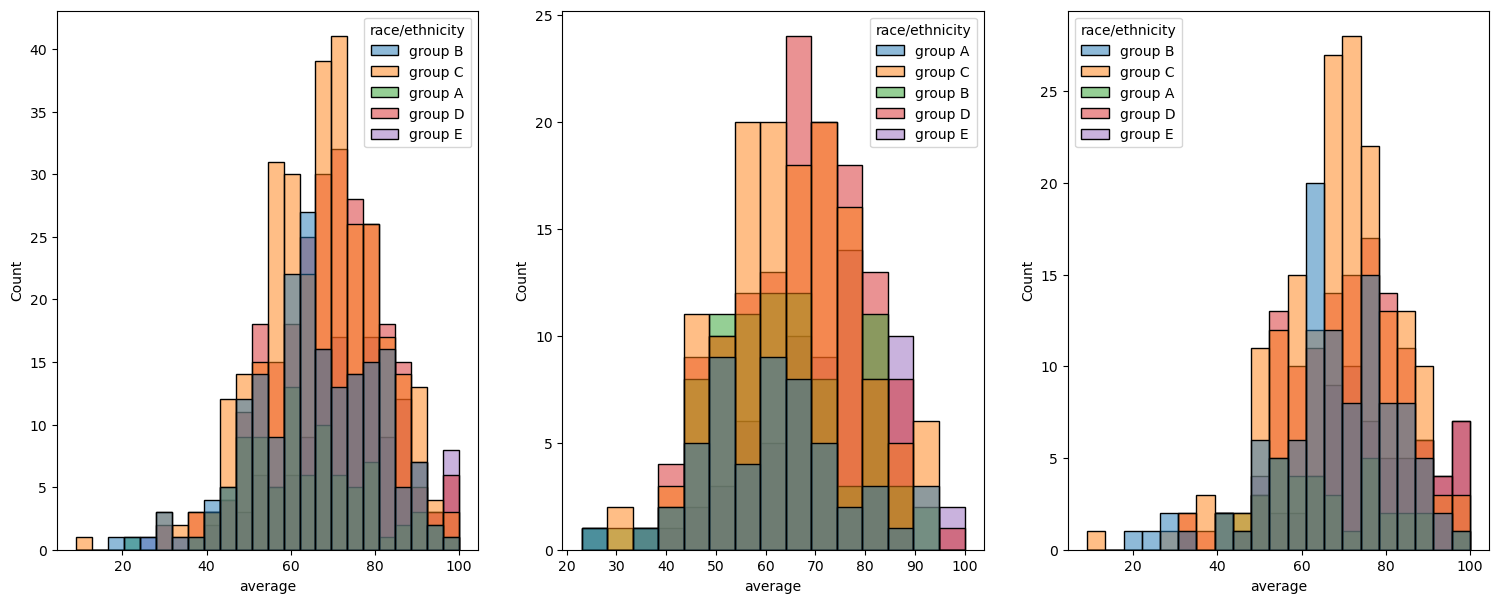

In [36]:
plt.subplots(1,3,figsize=(25,7))
plt.subplot(141)
sns.histplot(data = df,x = 'average',hue = 'race/ethnicity')

plt.subplot(142)
sns.histplot(data = df[df['gender']=='male'], x = 'average',hue = 'race/ethnicity')

plt.subplot(143)
sns.histplot(data = df[df['gender']=='female'], x = 'average',hue = 'race/ethnicity')
plt.show()

### Observations
- On whole stundents belonging to group C and D have performed better then rest
- Group A and B tend to perform poorly in exams irrespective of gender

<a name=Section645></a>
### **6.4.5 Maximum score of students in all three subjects**

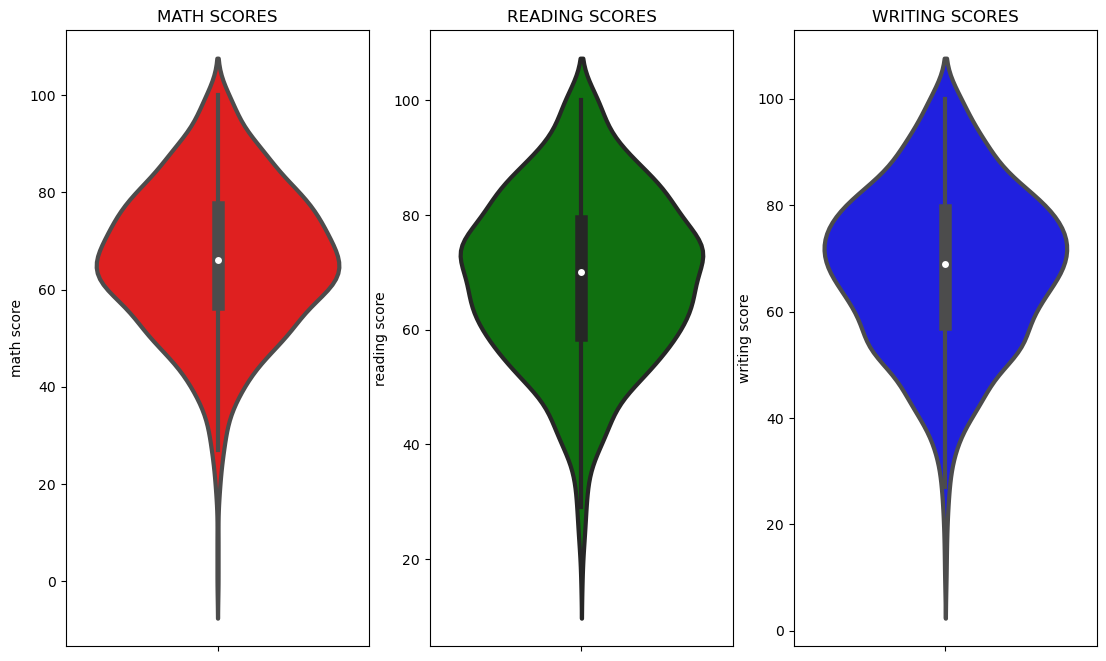

In [37]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

### Observations
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

<a name=Section65></a>
## **6.5 Multivariate analysis using pieplot**

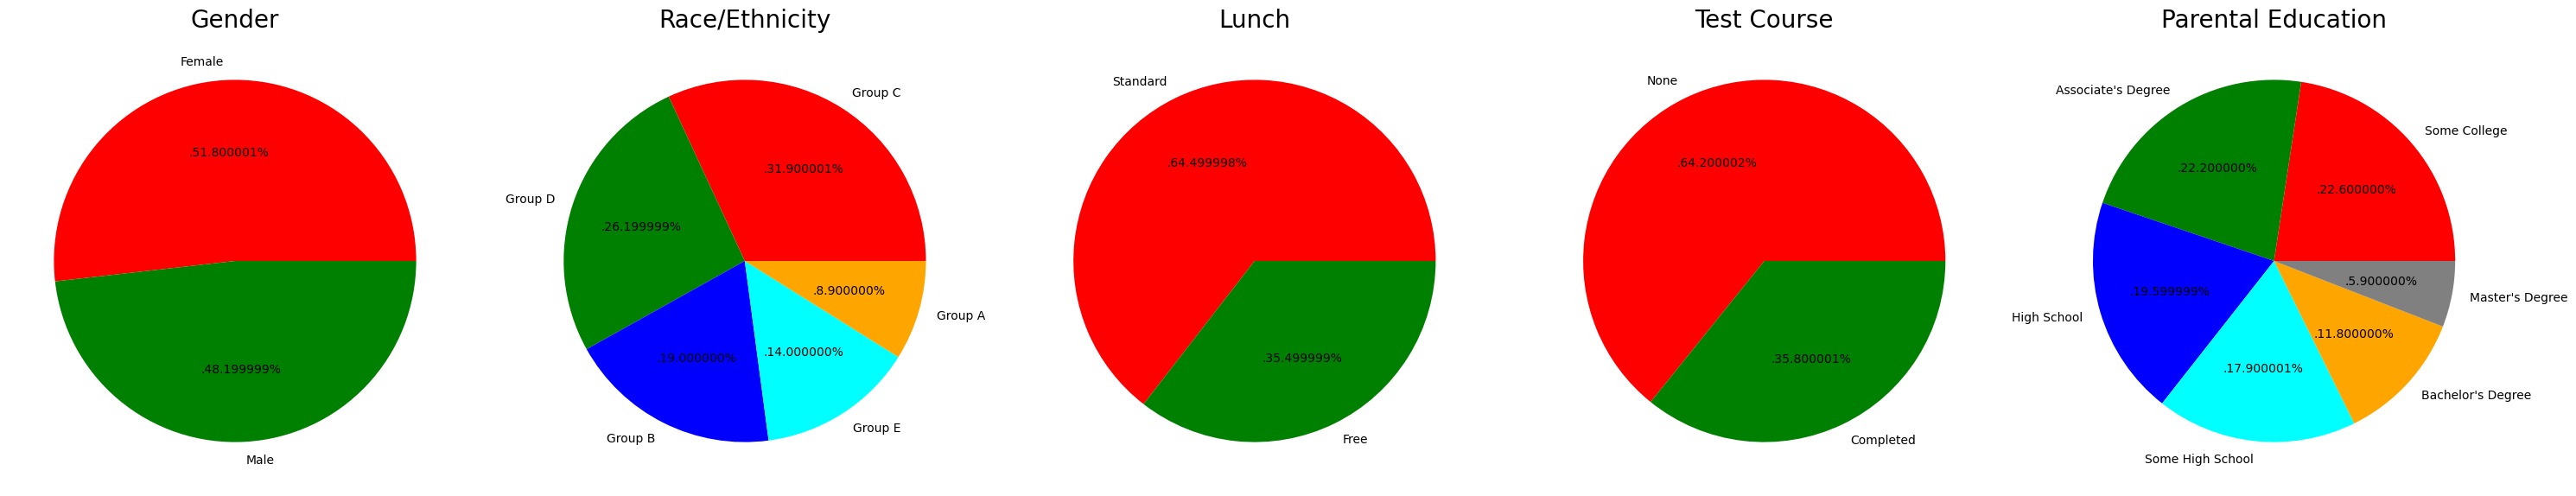

In [38]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Observations
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree" 

<a name=Section66></a>
##  **6.6 Feature Wise Visualization**

<a name=Section661></a>
### **6.6.1 Gender Column**
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

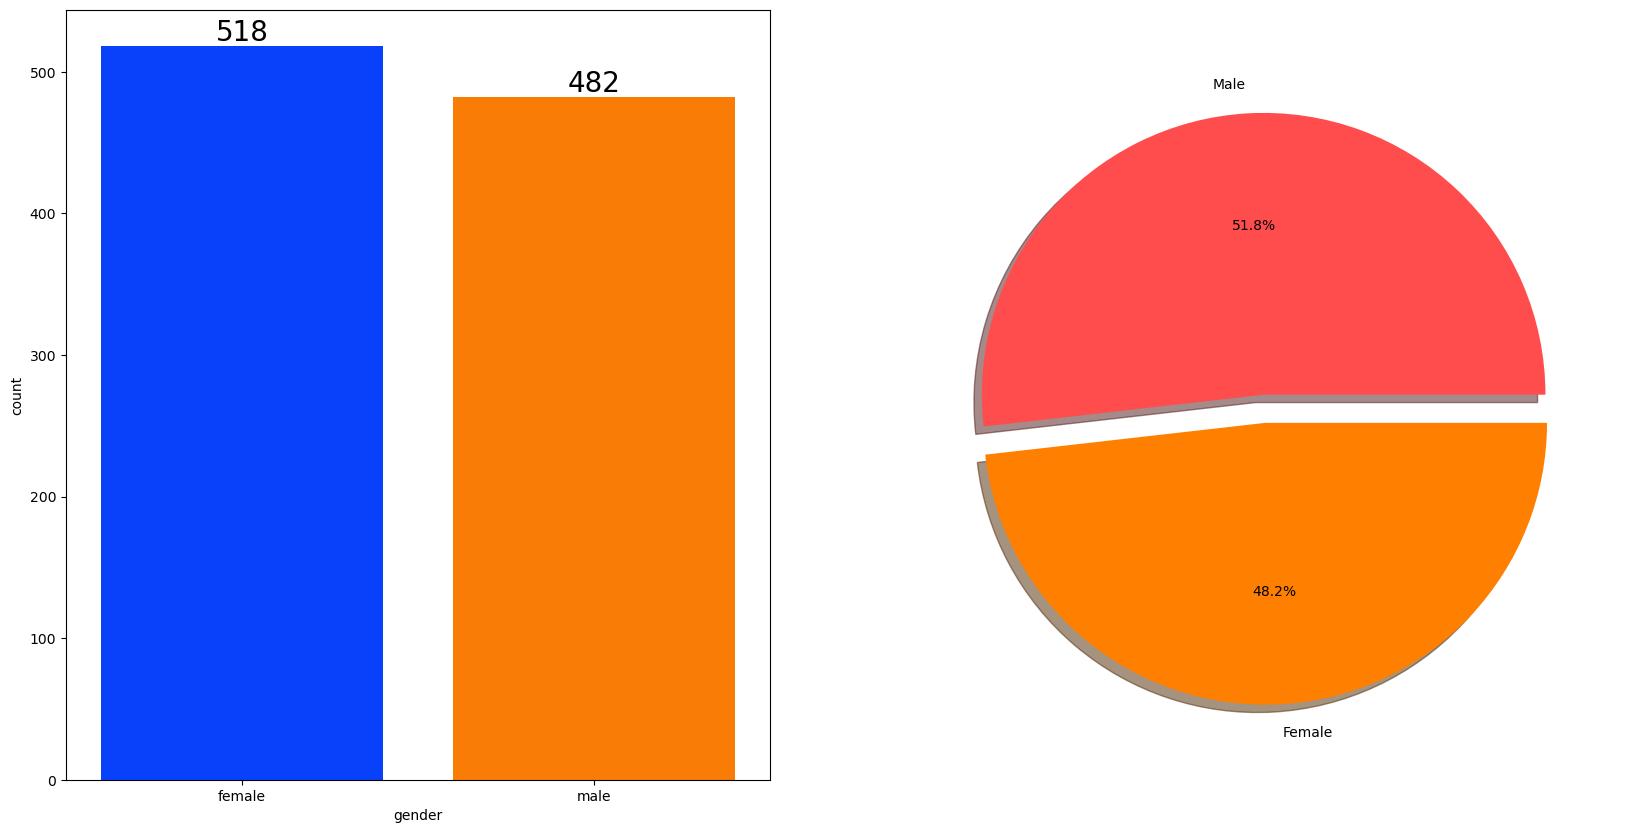

In [39]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

### Observation
- The gender column is almost evenly distributed 

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [40]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


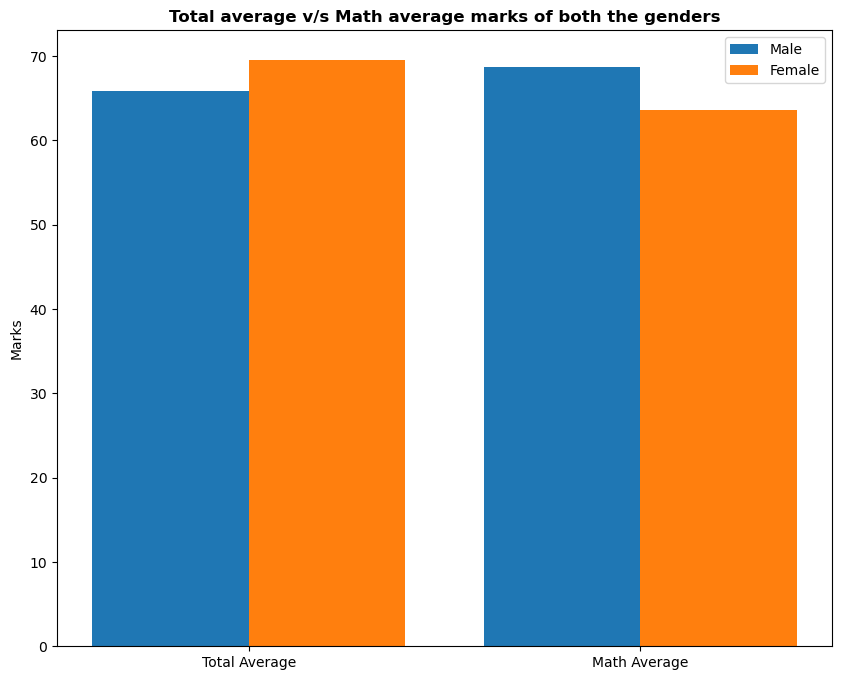

In [41]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Observation
- On Average female students perform better then male students
- Male Students perform better in math then Female Students

<a name=Section662></a>
## **6.6.2 RACE/EHNICITY COLUMN**
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

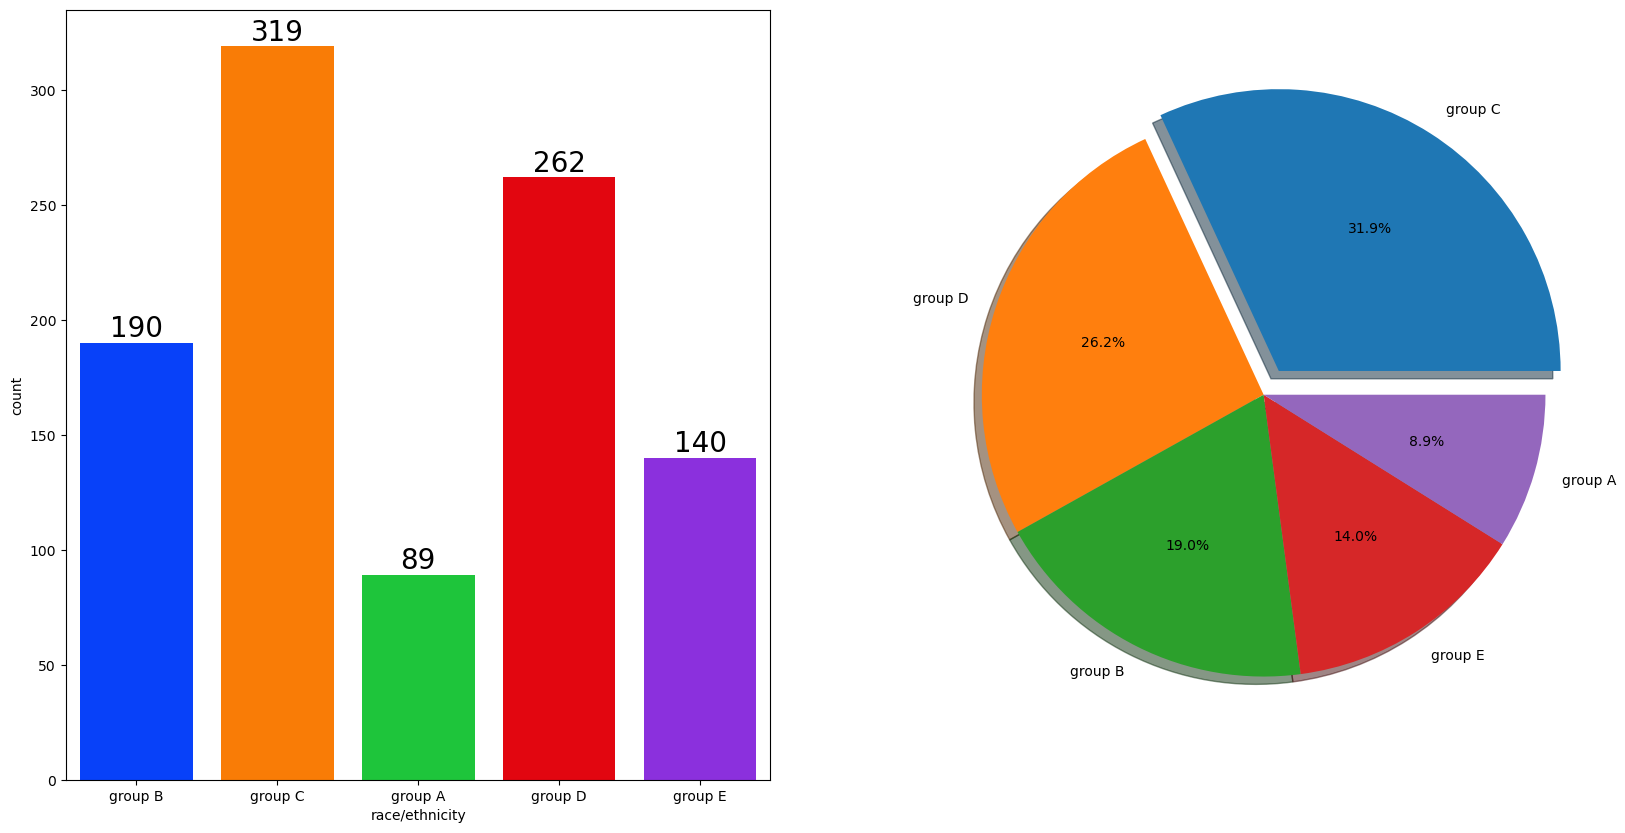

In [42]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

### Observation
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

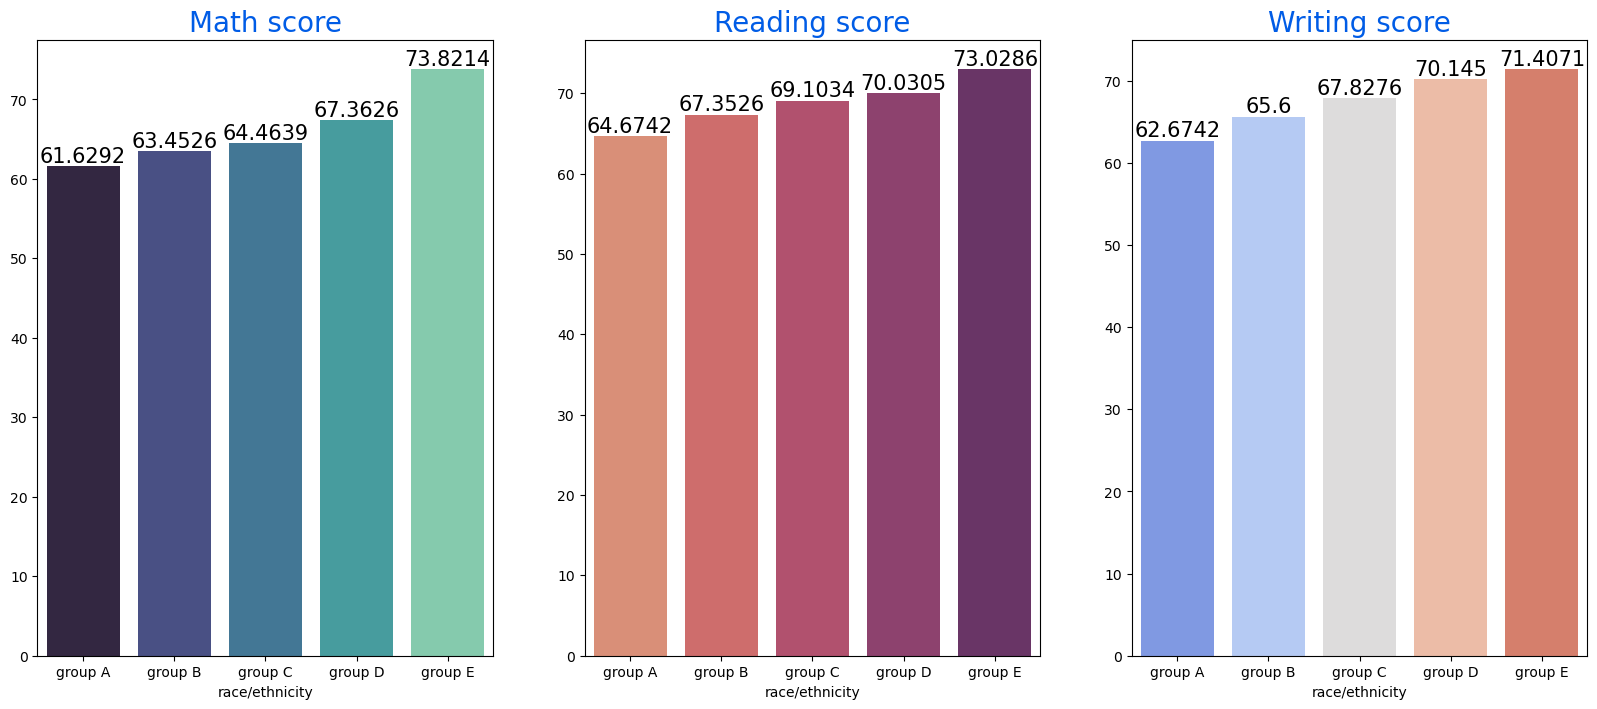

In [43]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Observations
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

<a name=Section663></a>
## **6.6.3 Parental Level of Education Column**
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

C:\Users\Ambika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


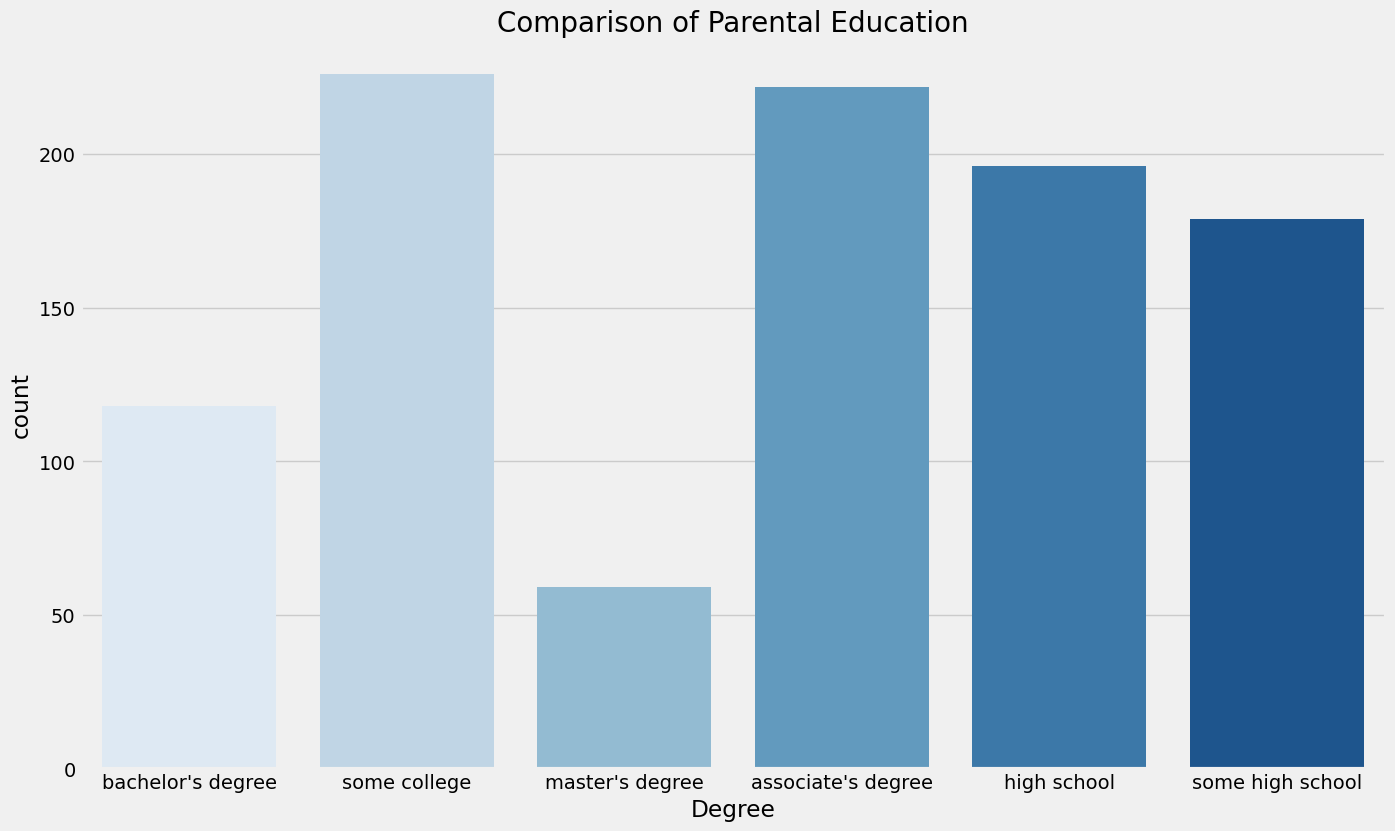

In [44]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### Observation
- Largest number of parents are from some college.

## BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

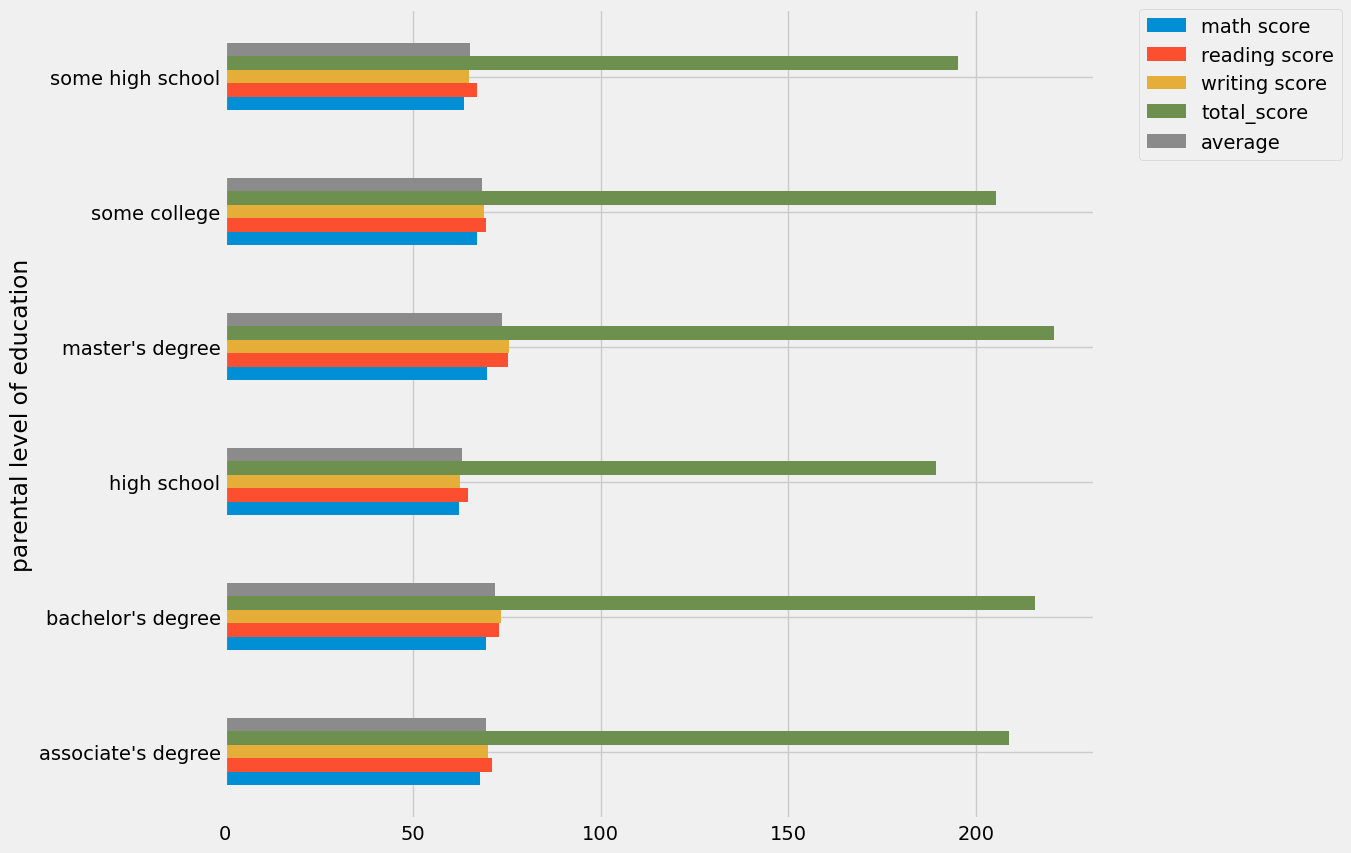

In [45]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Observations
- The score of student whose parents possess master and bachelor level education are higher than others.

<a name=Section664></a>
## **6.6.4 Lunch Column**
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

C:\Users\Ambika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


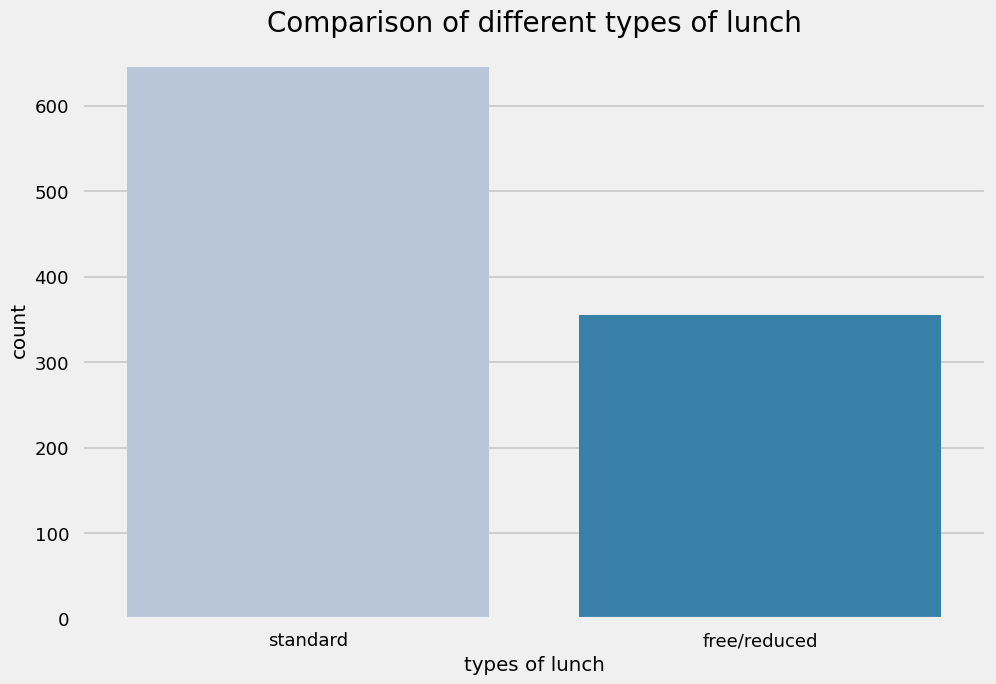

In [46]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

### Observation
- Students being served Standard lunch was more than free lunch

## BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

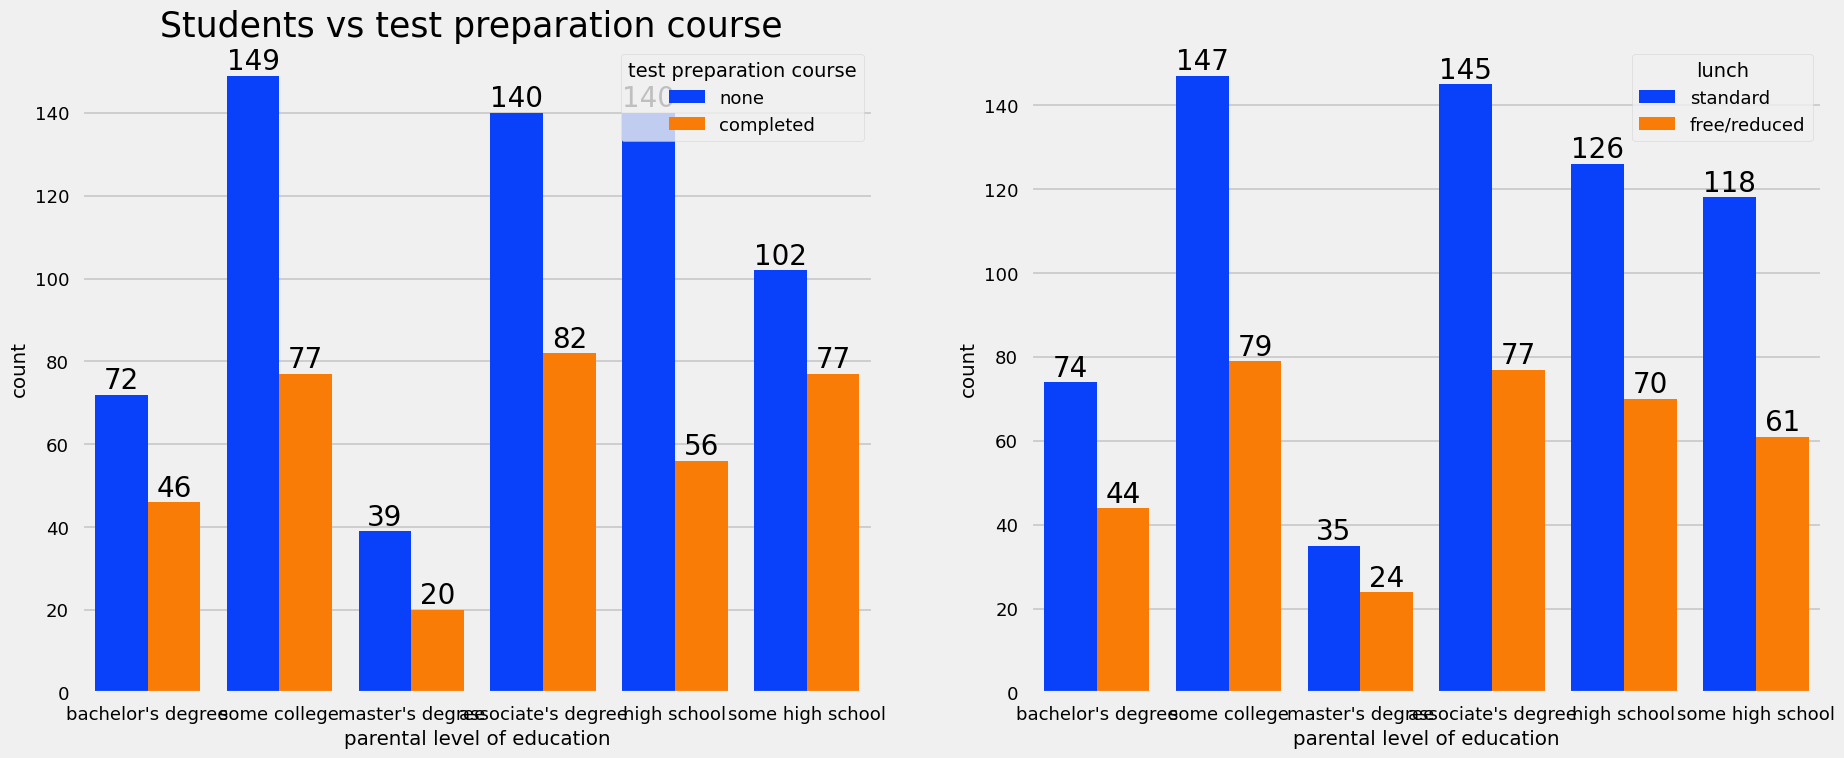

In [47]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

### Observation
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

<a name=Section665></a>
## **6.6.5 Test Preparation Course Column**
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

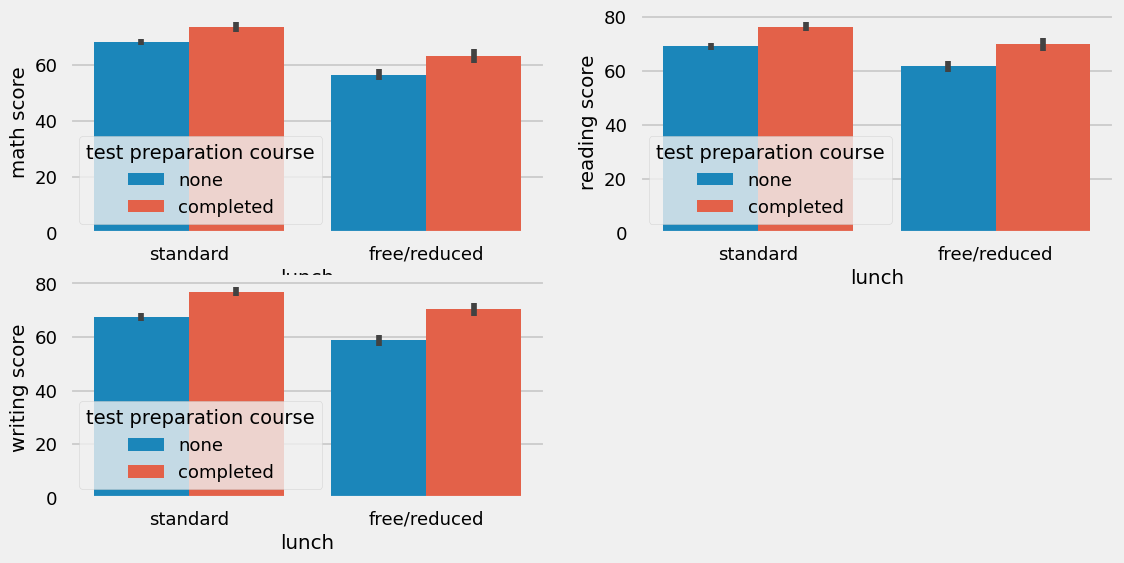

In [49]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.show()

### Observation
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

<a name=Section666></a>
## **6.6.6 Check Outliers**

C:\Users\Ambika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ambika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ambika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ambika\anaconda3\li

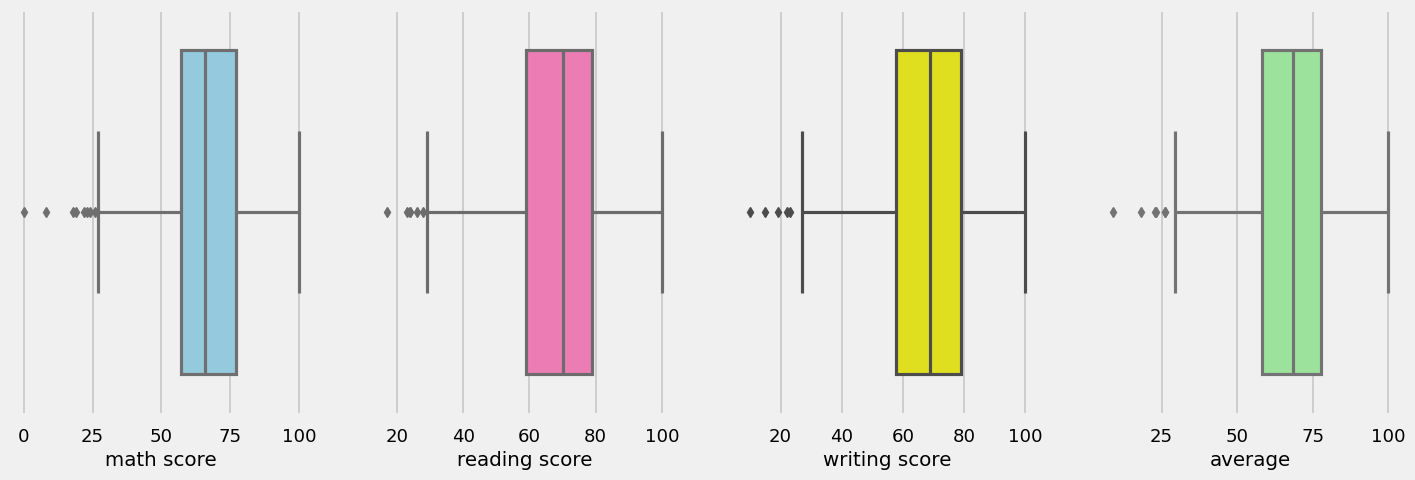

In [50]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

<a name=Section667></a>
## **6.6.7 MUTIVARIATE ANALYSIS USING PAIRPLOT**

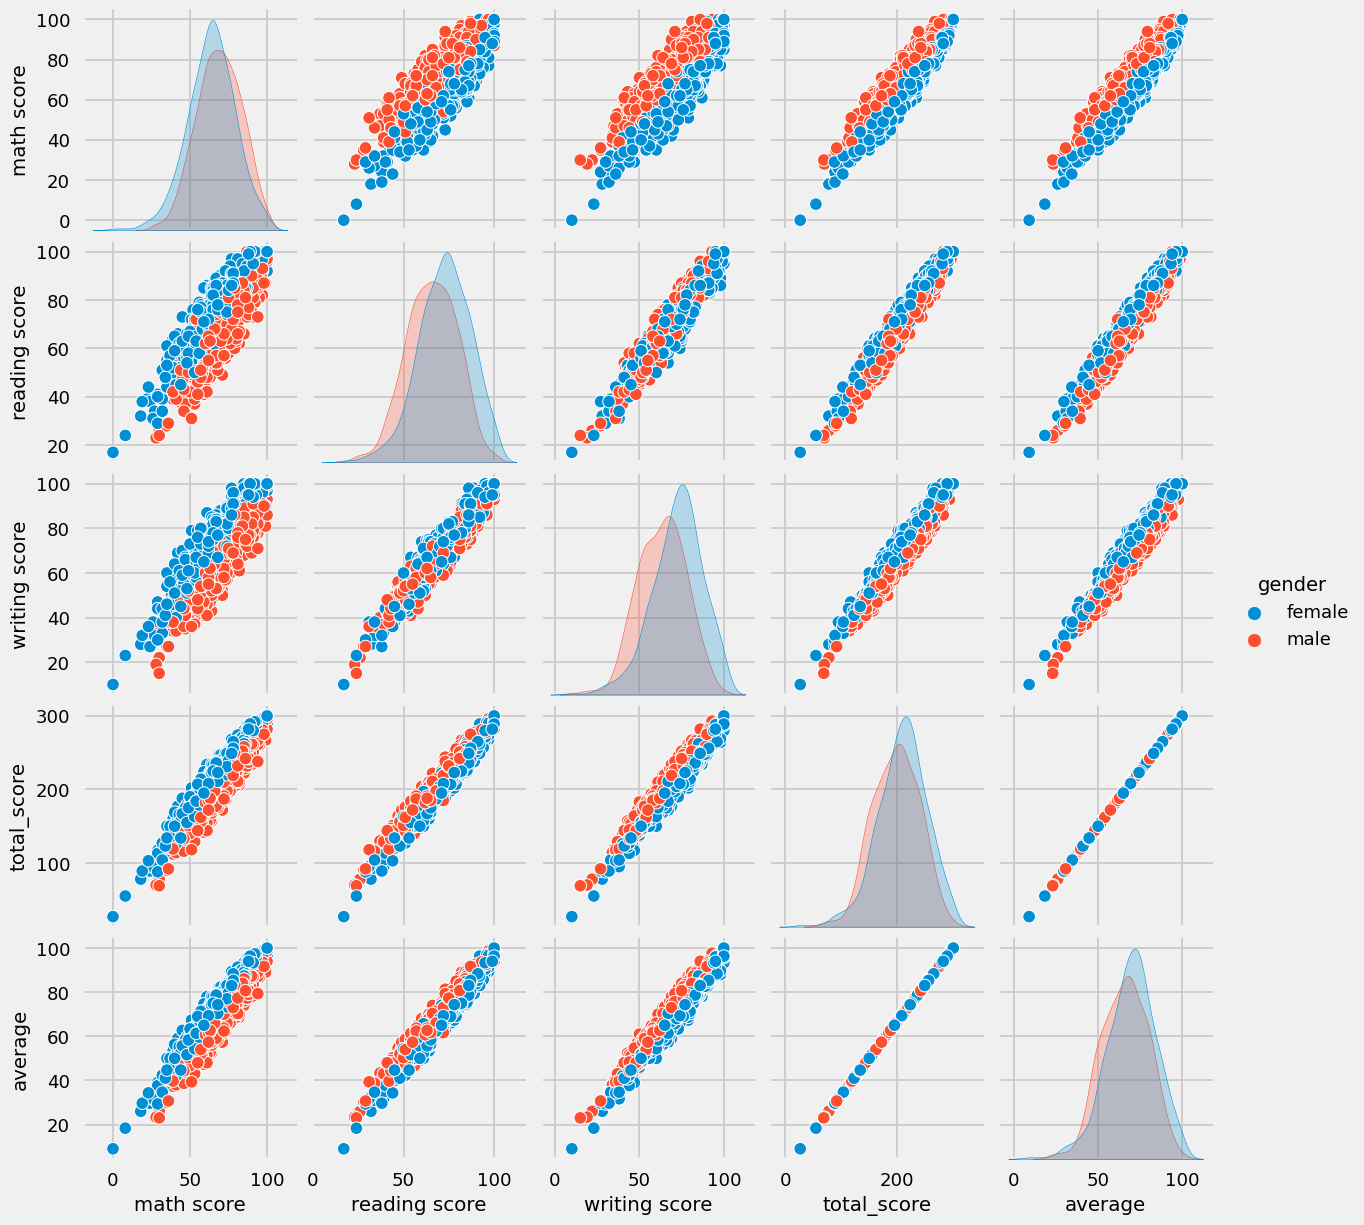

In [51]:
sns.pairplot(df,hue = 'gender')
plt.show()

<a name=Section7></a>
## **7 Summarization**
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.